In [7]:
import os
import sys
import math
import numpy as np
import scanpy as sc
import pandas as pd
import random
import anndata
import seaborn as sns
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from descartes import PolygonPatch
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

import pySTIM as pst

cmap = mcolors.LinearSegmentedColormap.from_list('WhRd',['#e5e5e5', "#fffacd", "red", "darkred"], N=256)  

In [3]:
adata = sc.read_h5ad("../Xenium_all.h5ad")

In [4]:
pair_list = [["ShamL", "ShamR"], ["Hour4L", "Hour4R"], ["Hour12L", "Hour12R"], 
			["Day2L", "Day2R"], ["Day14L", "Day14R"], ["Week6L", "Week6R"]]

groups = ["Sham","Hour4","Hour12","Day2","Day14","Week6"]

df = pd.DataFrame(columns = groups)
for idx, pair in enumerate(pair_list): 
	g = groups[idx]
	tmp_z = adata[adata.obs.ident.isin(pair)]
	df[g] = tmp_z.obs["celltype_plot"].value_counts()
	df[g] = df[g].div(df[g].sum(), axis=0)
	
ct_order = adata.obs.celltype_plot.cat.categories.to_list()
ct_color = adata.uns["celltype_plot_colors"]

In [5]:
df = df.loc[ct_order,]*100

In [13]:
celltype_color_dict = dict(zip(ct_order,adata.uns["celltype_plot_colors"]))

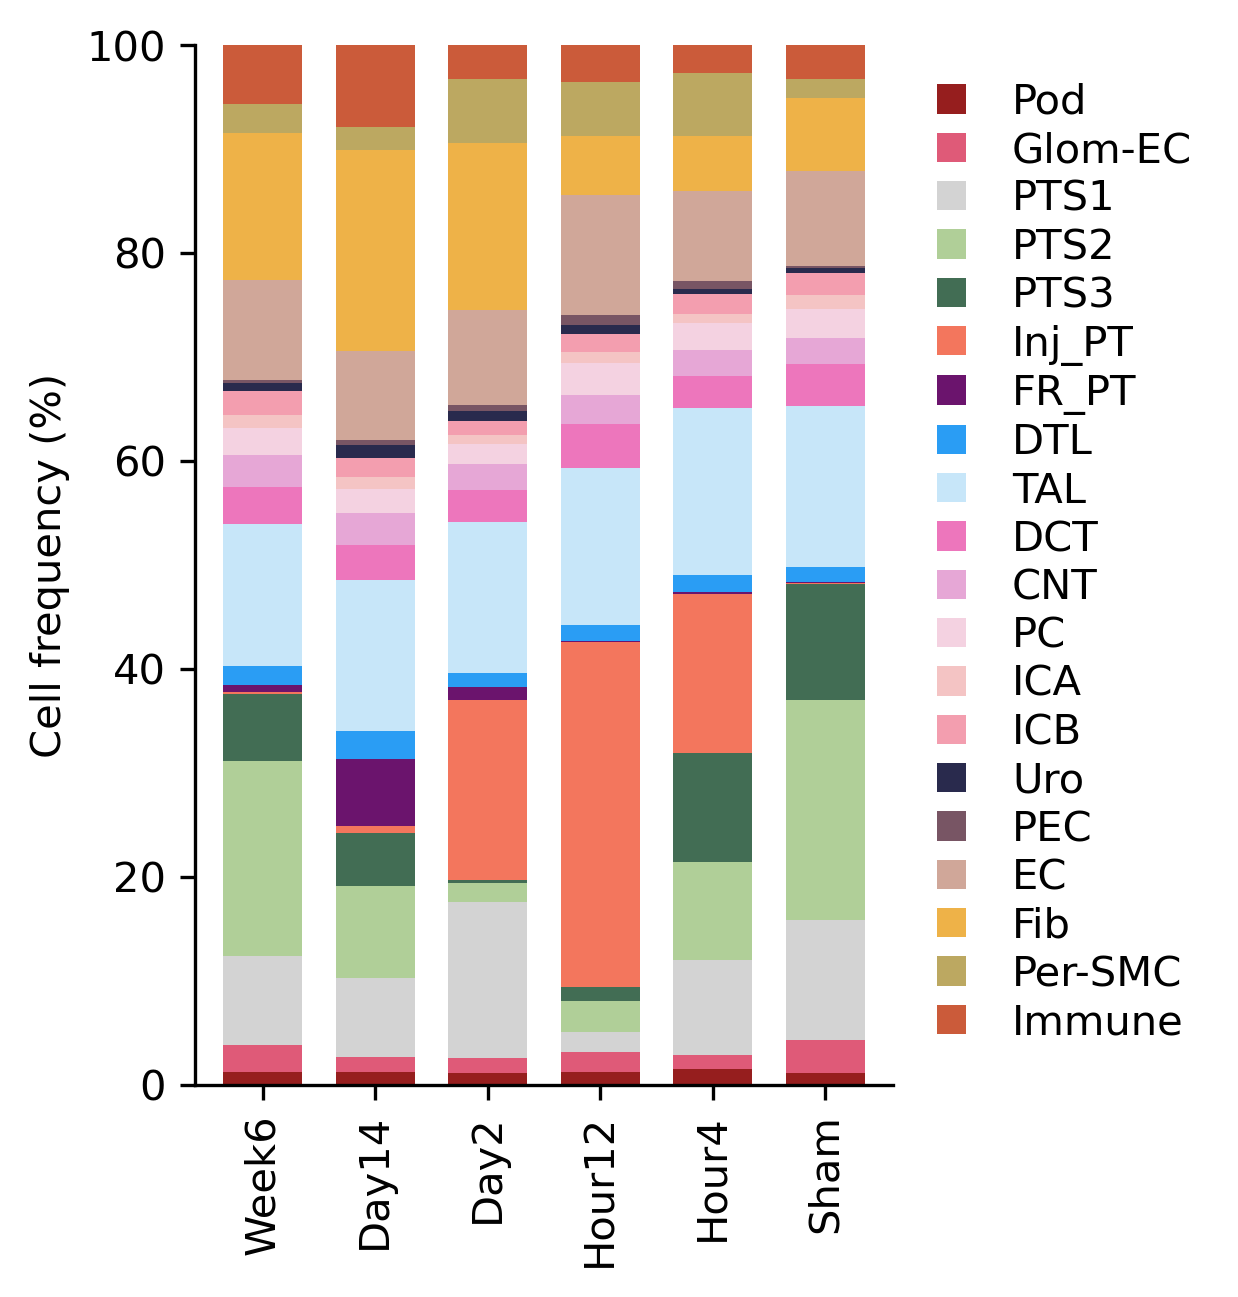

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(3, 4.5))
df.T.plot(kind='bar', stacked=True, ax = ax, zorder=0.5, alpha=1, 
               color=celltype_color_dict, width=0.7, edgecolor='none', legend=None)
ax.invert_xaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["Sham","Hour4","Hour12","Day2","Day14","Week6"])
ax.set_ylabel("Cell frequency (%)")
ax.set_ylim([0,100])
handles = [Patch(facecolor=color, label=label) for label, color in celltype_color_dict.items()]
ax.legend(handles=handles, bbox_to_anchor=(0.95, 1), loc='upper left', ncol=1, labelspacing = 0.2,
          frameon=False, handler_map={mpatches.Patch: HandlerSquare()}, fontsize=10)

plt.savefig("spatial_ct_composition.png", transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
## Celltype Visualization
pst.plot_scatter(adata[adata.obs.ident == "ShamR"], xlims=[1850,2150], ylims=[500,1400], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "sham_celltype.png")
                
pst.plot_scatter(adata[adata.obs.ident == "Hour4R"], xlims=[2700,3000], ylims=[3200,4100], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "hour4_celltype.png")                
pst.plot_scatter(adata[adata.obs.ident == "Hour12R"], xlims=[2300,2600], ylims=[1450,2350], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "hour12_celltype.png")
pst.plot_scatter(adata[adata.obs.ident == "Day2R"], xlims=[2700,3000], ylims=[600,1500], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "day2_celltype.png")
pst.plot_scatter(adata[adata.obs.ident == "Day14R"], xlims=[1600,1900], ylims=[3500,4400], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "day14_celltype.png")
pst.plot_scatter(adata[adata.obs.ident == "Week6R"], xlims=[1120,1420], ylims=[3650,4550], dpi=200, ptsize=15,
                    color_by='celltype', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "week6_celltype.png")
                

#### CN Visualization

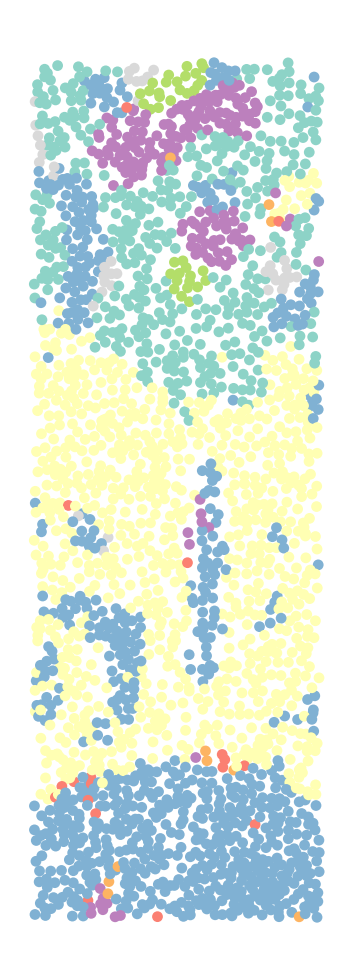

In [26]:
pst.plot_scatter(adata[adata.obs.ident == "ShamR"], xlims=[1850,2150], ylims=[500,1400], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "sham_CN.png")

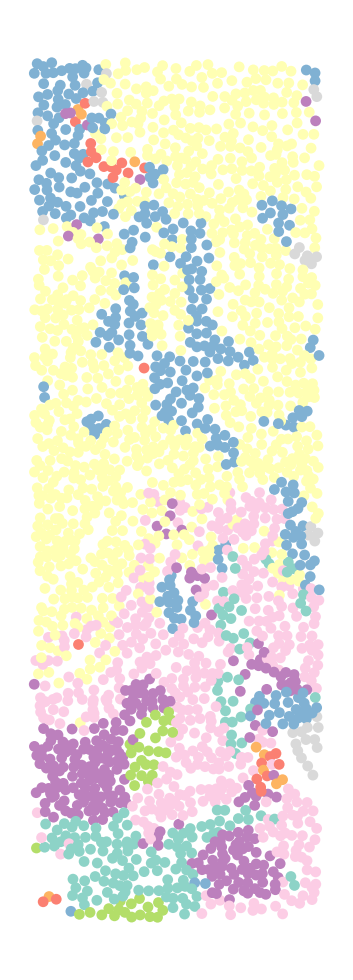

In [27]:
pst.plot_scatter(adata[adata.obs.ident == "Hour4R"], xlims=[2700,3000], ylims=[3200,4100], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "hour4_CN.png")

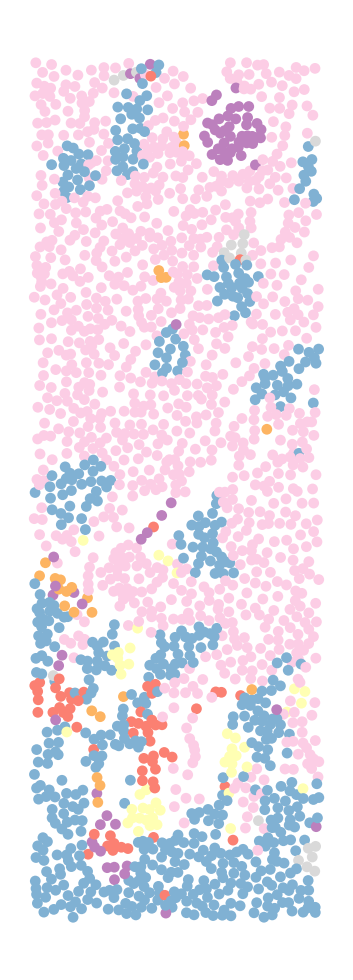

In [28]:
pst.plot_scatter(adata[adata.obs.ident == "Hour12R"], xlims=[2300,2600], ylims=[1450,2350], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "hour12_CN.png")

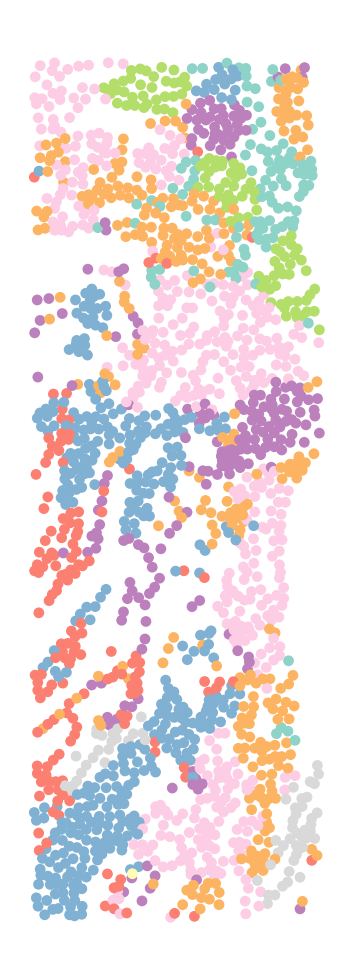

In [29]:
pst.plot_scatter(adata[adata.obs.ident == "Day2R"], xlims=[2700,3000], ylims=[600,1500], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "day2_CN.png")

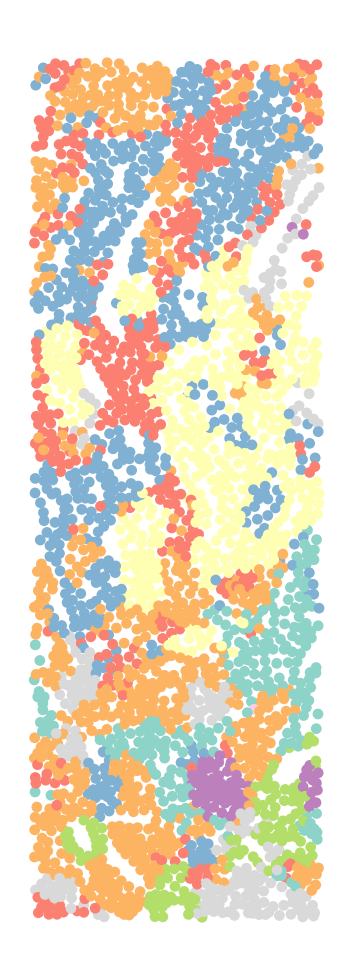

In [30]:
pst.plot_scatter(adata[adata.obs.ident == "Day14R"], xlims=[1600,1900], ylims=[3500,4400], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "day14_CN.png")

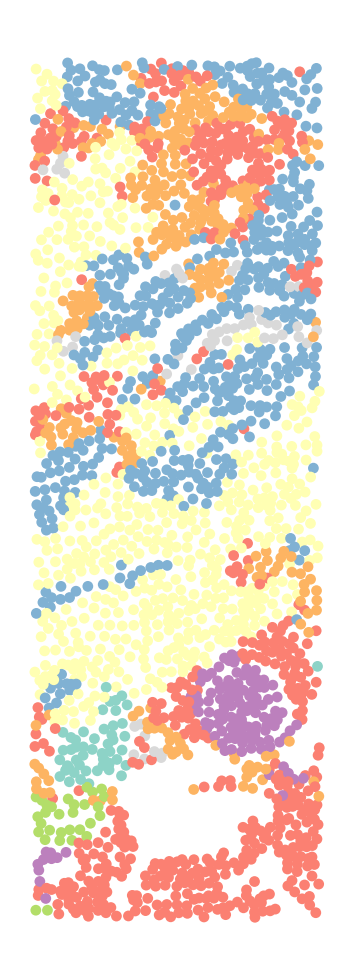

In [31]:
pst.plot_scatter(adata[adata.obs.ident == "Week6R"], xlims=[1120,1420], ylims=[3650,4550], dpi=200, ptsize=15,
                    color_by='CN_new', seed=123, alpha=1, ticks=False, 
                    width = 5, height = 5, save = "week6_CN.png")

In [ ]:
anchor_dict, _ = pst.register_xenium_visium(adata_xe, adata_vis, spot_diameter=55)
adata_vis = sc.read_h5ad("../Visium_all.h5ad")
adata_vis = pst.add_metadata(adata_vis, adata, anchor_dict, col = "CN")

sc.tl.rank_genes_groups(adata_vis, groupby = 'CN', method='wilcoxon', use_raw=False)
de_df = sc.get.rank_genes_groups_df(adata_vis, group = None)
marker_genes = de_df.groupby('group').head(3)['names'].unique().tolist()

CN4_de = sc.get.rank_genes_groups_df(adata_vis, group = "CN4", pval_cutoff = 0.05, log2fc_min = 1).names.to_list()

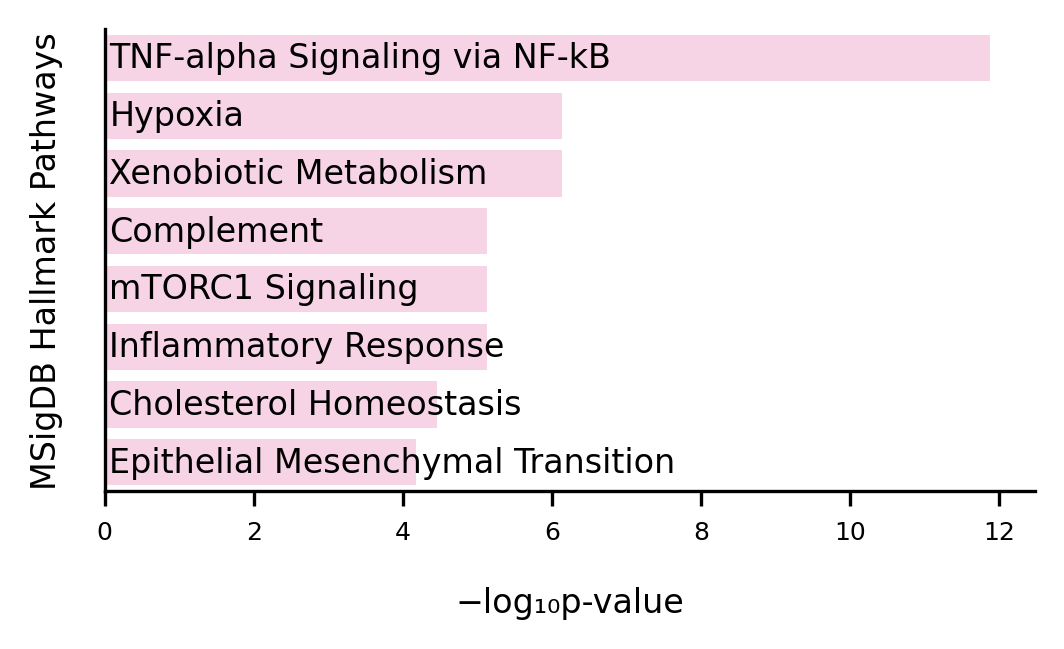

/home/spatial/projects/NBT_brief/Figure2/Injured_bar.png

In [37]:
enrichr_library = 'MSigDB_Hallmark_2020'
pst.gesa(CN4_de, enrichr_library, show_number = 10, bar_color = '#80b1d3')

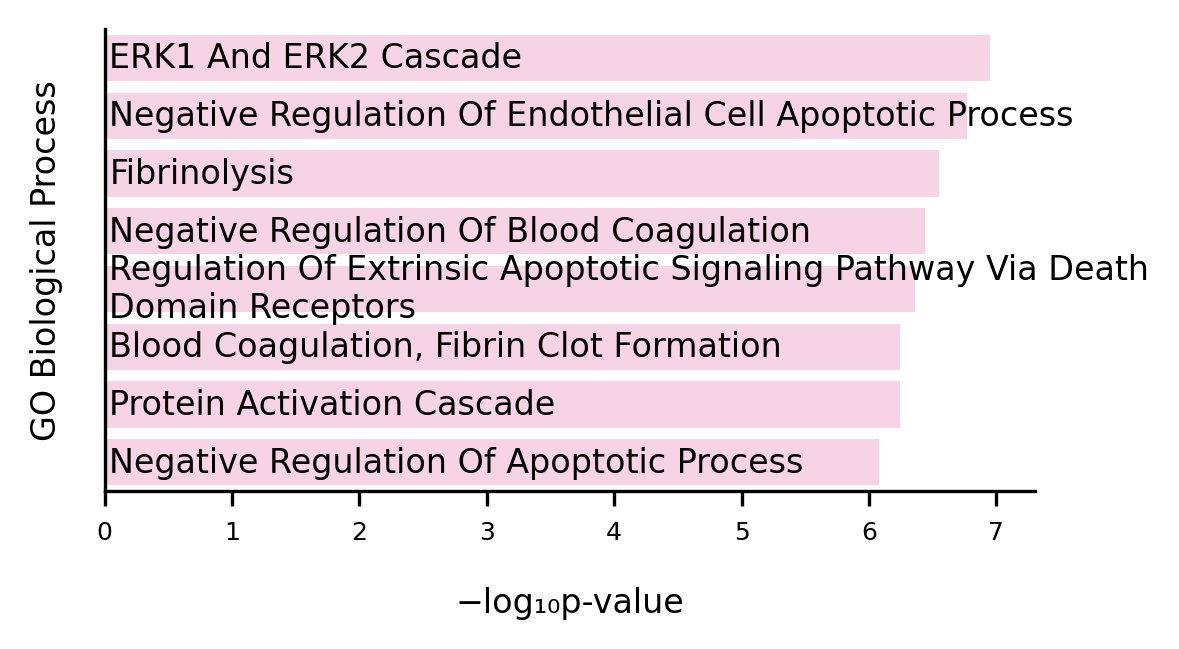

/home/spatial/projects/NBT_brief/Figure2/Injured_bar_2.png

In [39]:
enrichr_library = 'GO_Biological_Process_2023'
pst.gesa(CN4_de, enrichr_library, show_number = 10, bar_color = '#80b1d3')

In [40]:
CN7_de = sc.get.rank_genes_groups_df(adata_vis, group = "CN7", pval_cutoff = 0.05, log2fc_min = 1).names.to_list()

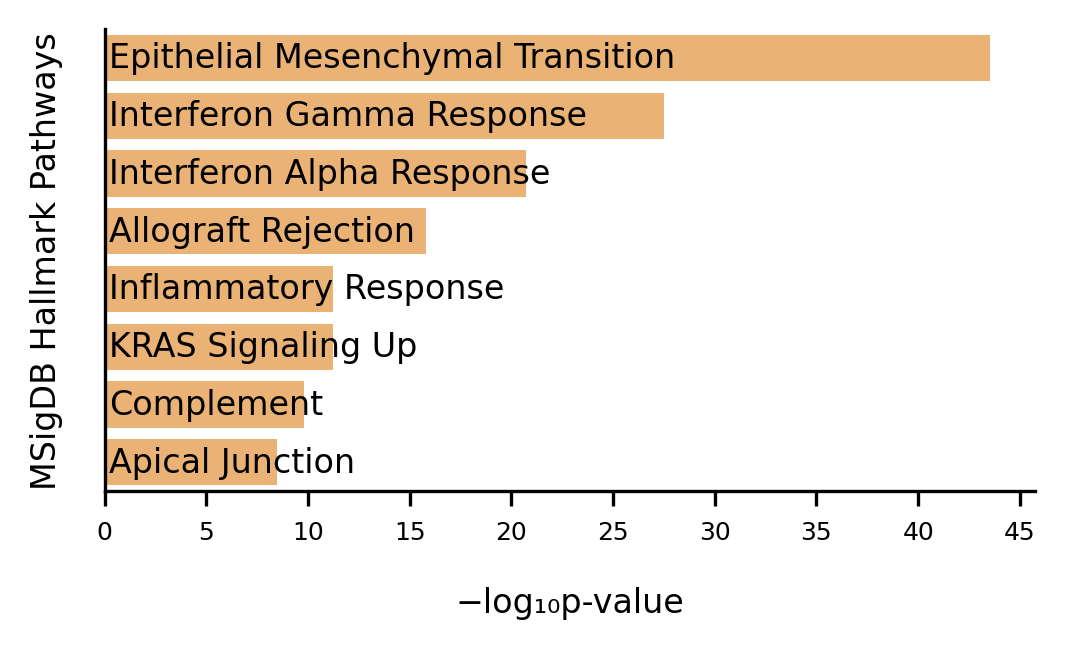

/home/spatial/projects/NBT_brief/Figure2/Fibrotic_bar.png

In [42]:
enrichr_library = 'MSigDB_Hallmark_2020'
pst.gesa(CN7_de, enrichr_library, show_number = 10, bar_color = '#fdb462')

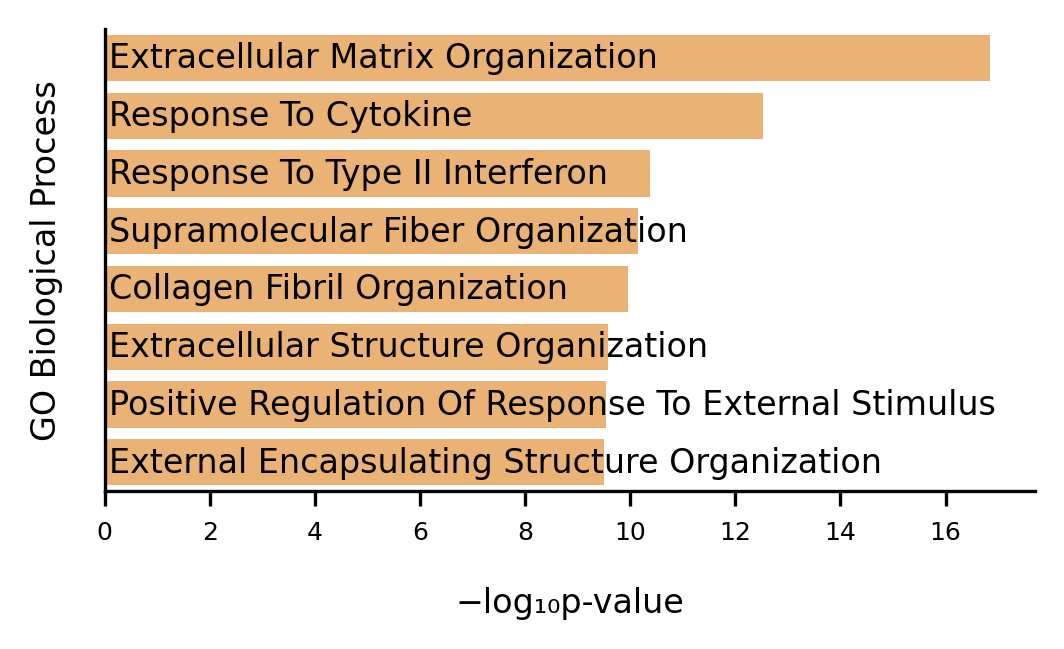

/home/spatial/projects/NBT_brief/Figure2/Fibrotic_bar_2.png

In [ ]:
enrichr_library = 'GO_Biological_Process_2023'
pst.gesa(CN7_de, enrichr_library, show_number = 10, bar_color = '#fdb462')

#### LR 

In [176]:
adata_day14 = pst.load_Xenium_iri_data()
poly_data_loaded = pst.Xenium_iri_poly.load_json()
adata_day14.uns["poly"] = poly_data_loaded
adata_day14.uns["poly"] = dict((k, adata_day14.uns["poly"][k]) for k in list(adata_day14.obs.index) if k in adata_day14.uns["poly"])

97
33


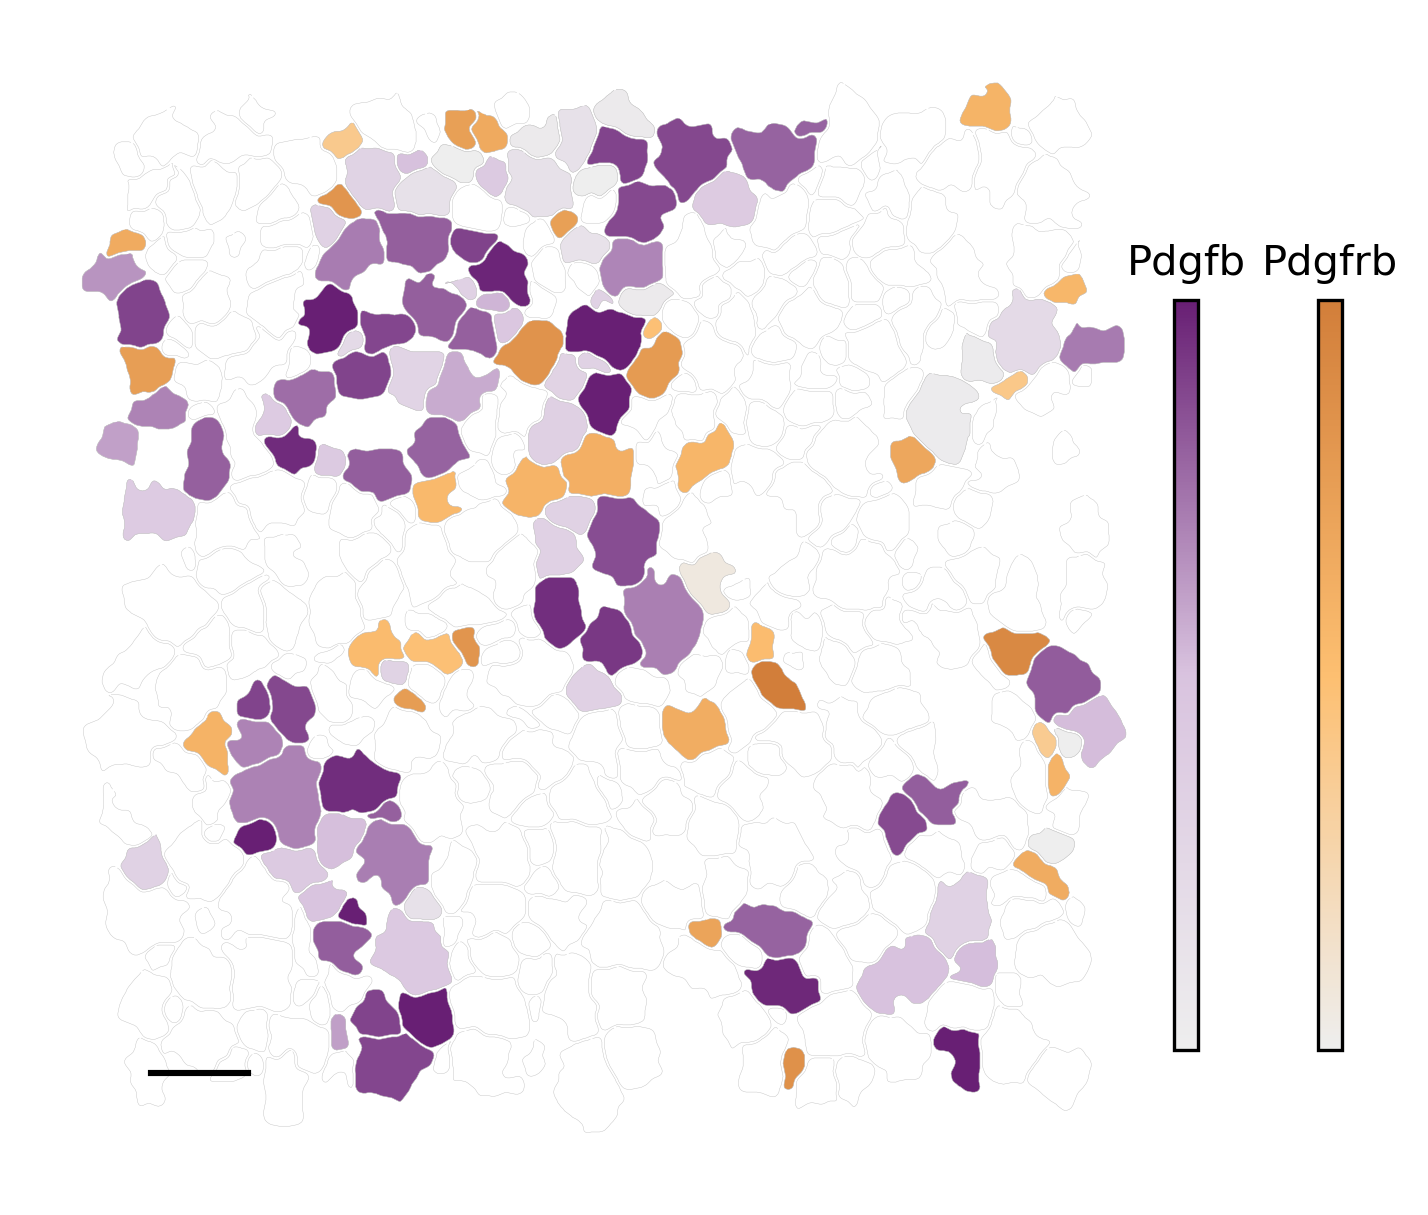

In [309]:
xlims = [1600,1800]
ylims = [4000,4200]
ligand = "Pdgfb"
receptor = "Pdgfrb"
bg_color = '#ffffff'
group = 'celltype_refine'
sender = "FR_PT"
receiver = "Fib"

cmap1 = mcolors.LinearSegmentedColormap.from_list('FRPT', ["#eeeeee","#d9c3df","#681f74"], N=256)
cmap2 = mcolors.LinearSegmentedColormap.from_list('BlueGrn', ["#eeeeee","#fdbf71","#d27e3a"], N=256)

pst.vis_lr_cci(adata_day14, group, xlims, ylims, ligand, receptor, sender, receiver, bg_color, 
               cmap1, cmap2, ptsize)

124
71


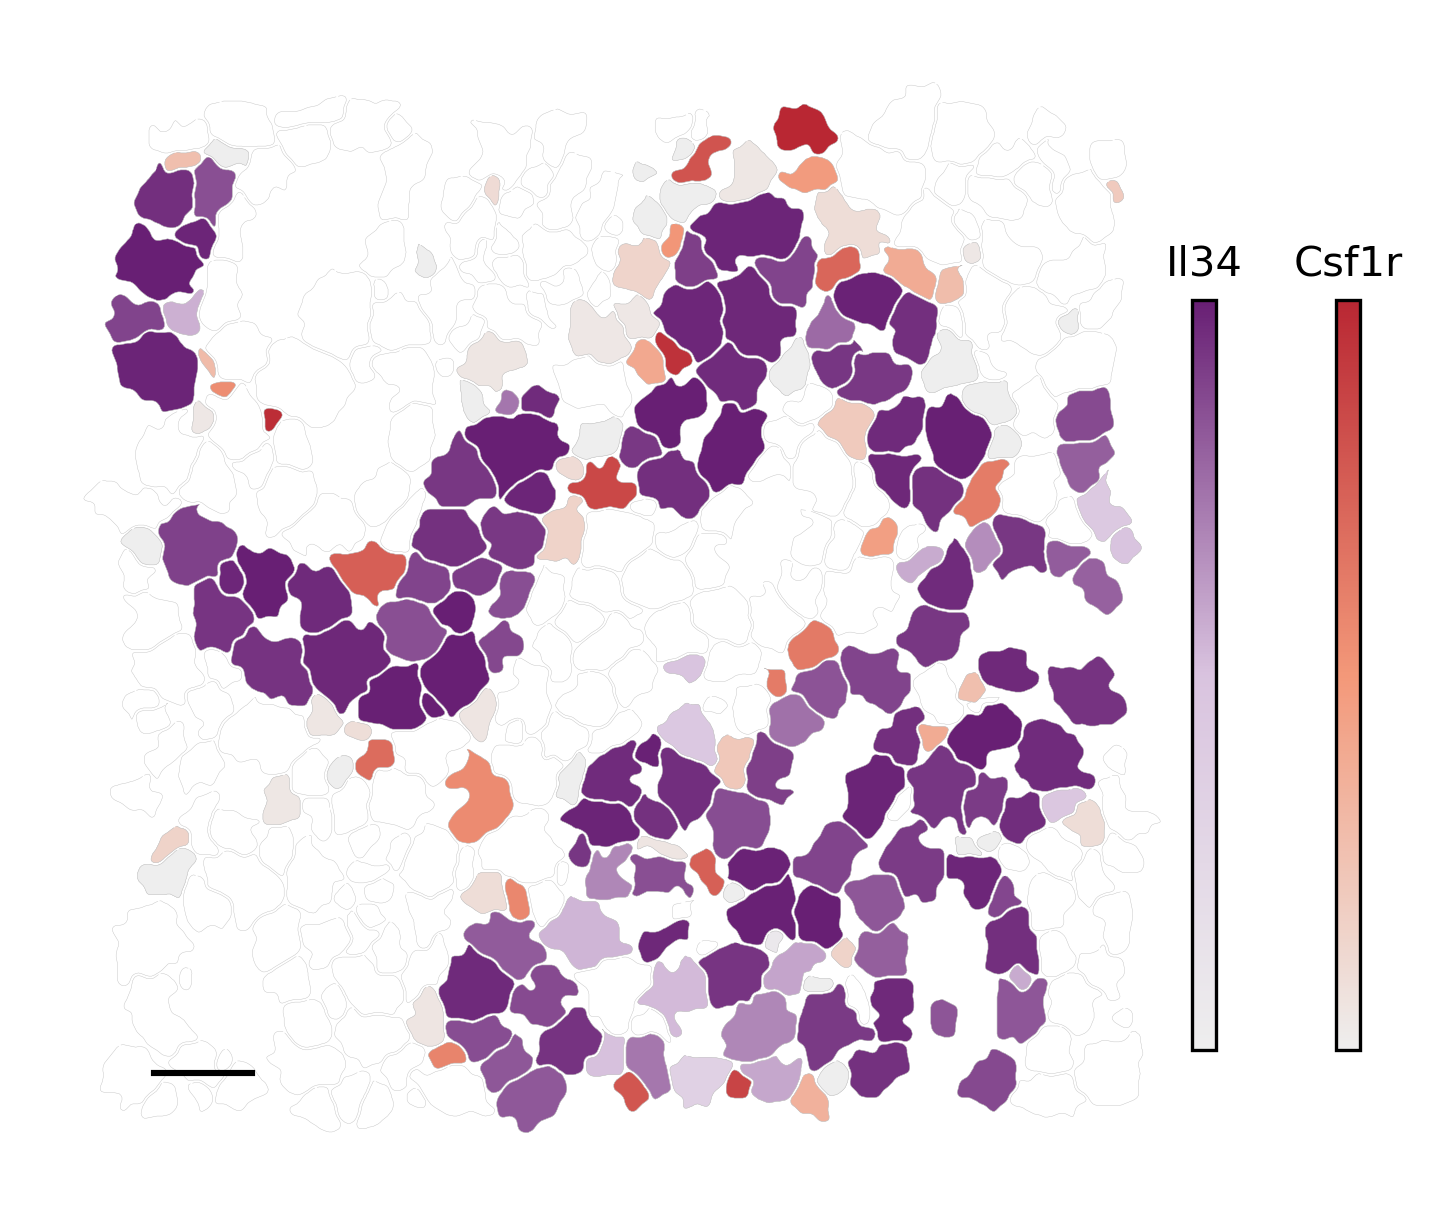

In [315]:
xlims = [1200,1400]
ylims = [850,1050]
ligand = "Il34"
receptor = "Csf1r"
bg_color = '#ffffff'
group = 'celltype'
sender = "FR_PT"
receiver = "Immune"

cmap1 = mcolors.LinearSegmentedColormap.from_list('FRPT', ["#eeeeee","#d9c3df","#681f74"], N=256)
cmap2 = mcolors.LinearSegmentedColormap.from_list('MP', ["#eeeeee","#f39879","#b92733"], N=256)

pst.vis_lr_cci(adata_day14, group, xlims, ylims, ligand, receptor, sender, receiver, bg_color, 
               cmap1, cmap2)